In [1]:
# import standard modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 10)

# Topic 1 - Averaging data to reduce uncertainty

## Motivation

Consider an experiment to measure a quantity, $x$. If this experiment is run many times under "identical" conditions, we would not expect the same result to occur each time. This will be due to a host of processes
that are beyond our control, but that can be usefully modelled as random.  

Suppose that running the experiment $n$ times has resulted in values $x_{1},x_{2},\dots,x_{n}$. What value of $x$ should be used, and what is the uncertainty on this value? 

## A simple statistical model

To proceed we need to formulate the problem appropriately. We assume that the result of the $i$th 
experiment takes the form

$
x_{i} = x + z_{i}, 
$

where $x$ is the true value and $z_{i}$ is a random error. We will assume that these errors 
are drawn from a **normal distribution** with zero mean and standard deviation $\sigma$. In cases where
the mean of the error is known but does not vanish, we can correct the data
such that the errors become zero-mean. 



## Applying an optimal estimate

To obtain an estimate, $\hat{x}$, of $x$ from the data, an obvious thing to do is form the 
arithmetic mean

$
\hat{x} = \frac{1}{n} \sum_{i=1}^{n} x_{i}.
$

Errors within the data propagate through to the estimate $\hat{x}$. We
should, therefore, think about $\hat{x}$ itself as a sample drawn from a probability distribution.
It can be shown that this distribution is normal with mean $x$ and with   standard deviation

$\sigma_{\hat{x}} = \frac{\sigma}{\sqrt{n}}$. 

Thus, by averaging, we have
reduced the uncertainty on the measurements by a factor of $\sqrt{n}$. 

Interestingly, the statements about the mean and standard deviation
of $\hat{x}$ do not require the data errors to be normally distributed. If, however, 
the error distribution is very far from normal, these two values alone need not be  informative. 

It can be shown that the arithmetic mean is the **optimal estimator** for this 
problem in the following sense. First, the estimator is **unbiased**, this meaning that 
its mean value is equal to the quantity we wish to estimate. Second, of all unbiased
estimators, it is the one with the smallest standard deviation. Again, these statements
hold whether or not the errors are normally distributed. 

Having discussed the basic method, we can see how this can be applied within the following code. Here we use the `scipy.stats` module to obtain random samples from a normal distribution. Details can be found at:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

We also the following `numpy` function:

https://numpy.org/doc/stable/reference/generated/numpy.average.html

to form the arithmetic average. 

In [2]:
# Function to test the performance of the arithmetic mean
def TestArithmeticMean(x,sigma,n):
    
    # Form the appropriate normal distribution
    X = stats.norm(loc = x, scale = sigma)
    
    # Get n sampeles from the distribution
    data = X.rvs(n)
    
    # Return the arthmetic mean and its standard deviation
    return np.average(data), sigma/np.sqrt(n)
    

# Set the parameters
x = 2
sigma = 0.1

# Set the number of samples
n = 10

# Run the method in a single instance and print the results
estimate , std = TestArithmeticMean(x,sigma,n)
print("Estimated value = %7.4f" % (estimate))
print("Standard deviation of estimator = %7.4f" % (std))

Estimated value =  2.0439
Standard deviation of estimator =  0.0316


You can experiment with the code above, changing the value of the parameters to see how the performance varies. 

To be more systematic, the code below applies the estimator many times to randomly sampled data. The results are plotted as a histogram, and its form compared to the PDF for the appropriate normal distribution. Details on the plotting function can be found at:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

while we also apply some further features of the normal distribution class from `scipy.stats`.

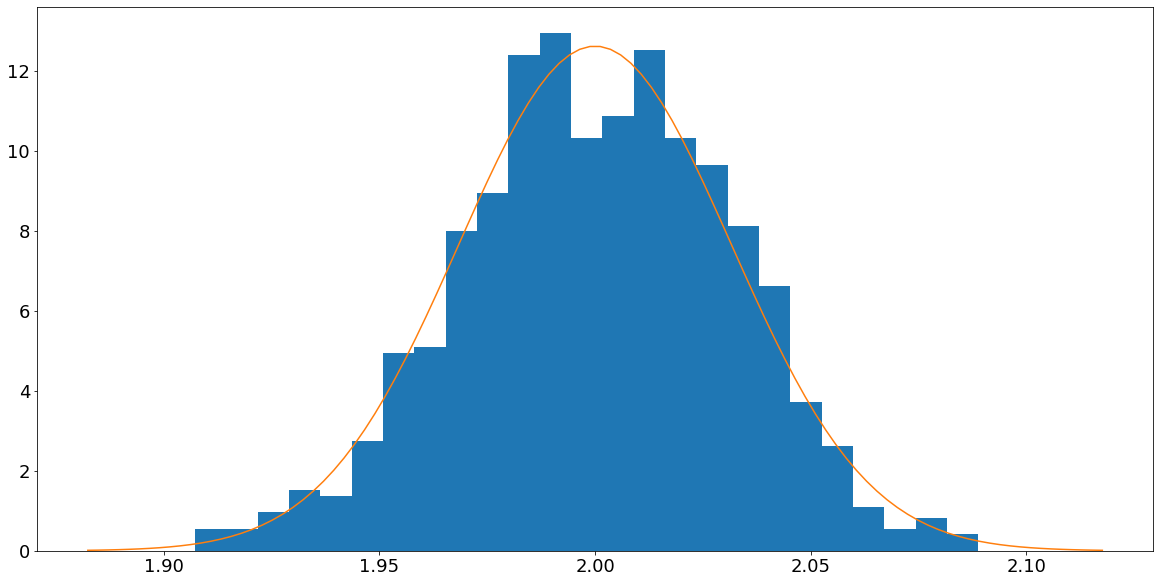

In [3]:
# Run the estimator many times and store the results
nRuns = 1000
estimates = []
for run in range(nRuns):
    estimate, std =  TestArithmeticMean(x,sigma,n)
    estimates.append(estimate)
    
# Plot the estimated values as a histogram
bins= int(nRuns/40)
plt.hist(estimates,bins,density = True)

# Plot the PDF for a normal distribution with the claimed parameters
X = stats.norm(x,std)
xx = np.linspace(X.ppf(0.0001), X.ppf(0.9999),100)
yy = X.pdf(xx)
plt.plot(xx,yy)
plt.show()   

## 


## Accounting for variable data errors

In practice, the errors associated with our measurements may not all be the same. In this case, we
need to use a **weighted mean** to get the optimal result. We write $\sigma_{i}$ for the 
standard deviation of the $i$th datum. We can then define the following estimator

$
\hat{x} = \frac{1}{\sum_{j=1}^{n}\frac{1}{\sigma_{j}^{2}}} \sum_{i=1}^{n} \frac{x_{i}}{\sigma_{i}^{2}}.
$

The first thing to note here is that if the standard deviations are all the same, then this formula reduces to the  arithmetic mean. Next, we observe that within the summation, the $i$th datum
is weighted by its inverse variance $\sigma_{i}^{-2}$. This means that data that are less
certain are down-weighted within the estimate. It can be shown that this estimator is
unbiased and that it has the smallest possible standard deviation, this being equal to

$
\sigma_{\hat{x}} = \sqrt{\frac{1}{\sum_{j=1}^{n}\frac{1}{\sigma_{j}^{2}}}}.
$

Calculation of weighted means can be readily done using `numpy.average` through specification of the optional argument `weights`. You might wish to implement and test this method for yourself. 

As a final point, we note that the situation here is not the most general that occurs in practice. It has been assumed implicitly that the errors for the measurements are **uncorrelated**. If this is not the case, it is necessary to know and make use of the **covariance matrix** for the error distribution. 